In [ ]:
ls

Gammar.jpg  lenna2.png  Noise.PNG     university.png
HE.PNG      Lenna.png   sample_data/


In [ ]:
def original():
  plt.figure()
  plt.imshow(gray_image_array, plt.cm.gray)
  plt.title('Original image')

# Your first programming homework

This is your first homework. The goal of this homework is:

- Help you get familiar with the progress, checking the instructions and submitting your homework.

- Help you get familiar with the software/library/environment you need to finish the homework.

- Help you get familiar with the basic image processing process.

# Image IO & pixel transformation

## Q 0, read the image and display. 

Please upload the image to the Colab file. You can file the "File" icon on the left. Please click it and check the tools above. Please click upload to upload the image "Gammar.jpg", which can be downloaded from the Canvas

(419, 505)


Text(0.5, 1.0, 'Original image')

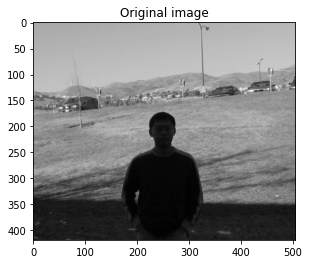

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

im = plt.imread('Gammar.jpg').astype(float)

print(im.shape)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Q1： Please design the gammar transformation

Please set c=1 and find the best gammar value that could make the people in the image clearer based on your experiment.

Text(0.5, 1.0, 'New image')

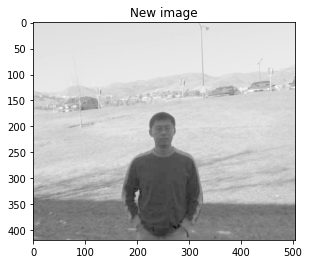

In [ ]:
def GammarTransform(img):

# S = cr^y
# r = input image
# S = output image
# c = 1
# y = gamma
  # y < 1 -> Brighter
  # y > 1 -> Darker
  
  '''
  Please add your code below
  '''
  img = img ** 0.33
  return img

NewImg=GammarTransform(im)
plt.figure()
plt.imshow(NewImg, plt.cm.gray)
plt.title('New image')

## Q2: Reconstruction using 8th bit plane.

- Download the test image of "Lenna.png" and upload it to this Colab workspace.

- The following code will read and convert it into grayscale. You need to reconstruct the image using its 8th bit plane.

(512, 512)


Text(0.5, 1.0, 'grayscale image')

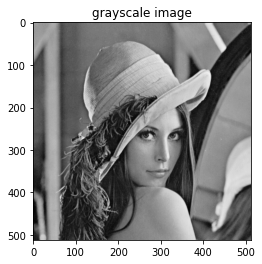

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image=Image.open('Lenna.png')
gray_image=image.convert('L')
gray_image_array=np.asarray(gray_image)

print(gray_image_array.shape)

plt.figure()
plt.imshow(gray_image_array, plt.cm.gray)
plt.title('grayscale image')

[  0 128]


Text(0.5, 1.0, 'New image')

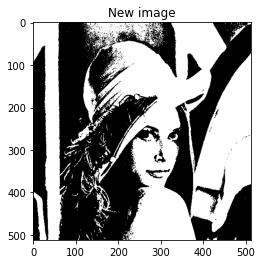

In [ ]:
def The8thBitPlane(img):
  '''
  Add your code below
  '''
  # Source: https://theailearner.com/2019/01/25/bit-plane-slicing/
  bit=8 # The nth bit to extract
  L=[] # 1D list of values
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      # Convert pixel to binary
      L.append(np.binary_repr(img[i][j],width=8)) # Add binary value to back of list
      
  bitVal = 2**(bit-1) # Determines the value of the bit being extracted
  # Only unique values in newImg will be 0 and bitVal
  newImg = np.array([int(i[8-bit]) for i in L],dtype = np.uint8) * bitVal
  print(np.unique(newImg))
  newImg = newImg.reshape(img.shape[0],img.shape[1]) # Return list to original image shape
  return newImg

plt.figure()
plt.imshow(The8thBitPlane(gray_image_array), plt.cm.gray)
plt.title('New image')

## Q3: Histogram Equalization

- Please download the "HE.PNG" image from Canvas and upload to the workspace in Colab (provided)

- Read the image and display the image (provided)

- Generate the histogram of the given image and display below

- Design the histogram Equalization function and display the result. You should not use existing/pre-built histogram equalization function.

- Generate the histogram of the given image and display below

(215, 214)


Text(0.5, 1.0, 'grayscale image')

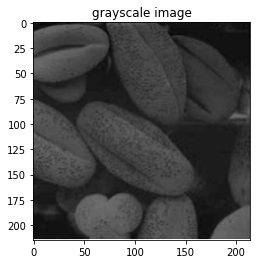

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image=Image.open('HE.PNG')
gray_image=image.convert('L')
gray_image_array=np.asarray(gray_image)

print(gray_image_array.shape)

plt.figure()
plt.imshow(gray_image_array, plt.cm.gray)
plt.title('grayscale image')

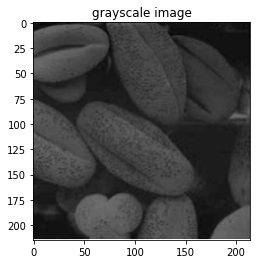

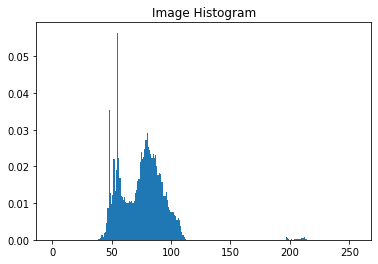

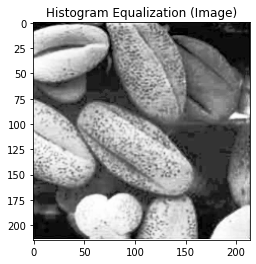

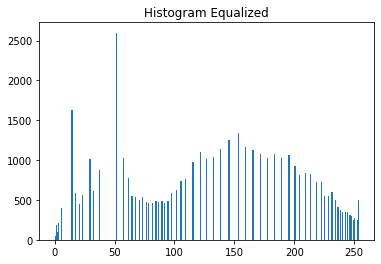

In [ ]:
import cv2
def GenerateAndDisplayTheHistogram(img):
  """
  Please add your code below to 
  1. calculate the histogram of the "img"
  2. Display it using the matplotlibe
  """
  h, edges = np.histogram(img.flatten(), bins=256, range=(0, 256))  # Get histogram of values
  h = np.divide(h, gray_image_array.size) # This is pr(rk)

  plt.figure()
  plt.title("Image Histogram")
  # plt.hist(np.array(img).flatten(), bins=range(0,255))
  plt.bar(edges[:-1], h, width=1) # This is pr(rk)
  plt.show()
def histogramEqualization(img):
  """
  Please add your code below to 
  1. Equalize the histogram of the "img"
  2. Display it using the matplotlibe
  """
  # Source: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html
  h, edges = np.histogram(img.flatten(), bins=256, range=(0, 256))  # Get histogram of values
  cdf = h.cumsum()  # Create cumulated array totalling number of pixels
  cdf_normalized = cdf * h.max() / cdf.max()
  # Divides normalized cdf by # of pixels to total out to 1, then multiply by bins (255). Rounds to nearest int
  cdf_normalized = np.round(np.multiply(np.divide(cdf_normalized, cdf_normalized[len(cdf_normalized)-1]), 255))

  h = np.divide(h, gray_image_array.size) # This is pr(rk)
  newImg=np.array(img)  # Gives access to img without editing original

  # Map previous pixel values to equalized values
  for line in range(img.shape[0]):
    for pixel in range(img.shape[1]):
      temp = img[line, pixel] # The old value
      newImg[line][pixel] = cdf_normalized[temp]

  # Display histogram equalized image
  plt.figure()
  plt.title("Histogram Equalization (Image)")
  plt.imshow(newImg, plt.cm.gray)
  
  # Display histogram equalized
  plt.figure()
  plt.hist(newImg.flatten(), bins=range(0,255))
  # plt.bar(range(0,256), newImg.flatten(), width=1) # This is pr(rk)
  plt.title("Histogram Equalized")
  plt.show()
  # return cdf_normalized
'''
add your test code below. This part is very open but make sure your output results include the following
1. The histogram of the given image
2. The updated image of the given image after histogram equalization
3. The histogram of the given image after histogram equalization
'''
plt.figure()
plt.imshow(gray_image_array, plt.cm.gray)
plt.title('grayscale image')
GenerateAndDisplayTheHistogram(gray_image_array)
histogramEqualization(gray_image_array)
#plt.plot(bin_edges[:-1],result)
# plt.figure()
# plt.imshow(histogramEqualization(gray_image_array), plt.cm.gray)

# Image Filtering

## Q0: mean filter & median filter & Gaussian Filter

- Download the image Noise.PNG from Canvas and upload to the Colab workspace

- Read the file, convert into grayscale and display (provided)

- Apply the mean filter and display (kernel: 3 by 3)

- Apply the median filter and display (kernel: 3 by 3)

- Apply the mean filter and display

(192, 309)


Text(0.5, 1.0, 'grayscale image')

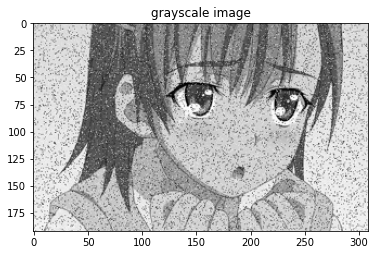

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image=Image.open('Noise.PNG')
gray_image=image.convert('L')
gray_image_array=np.asarray(gray_image)

print(gray_image_array.shape)

plt.figure()
plt.imshow(gray_image_array, plt.cm.gray)
plt.title('grayscale image')

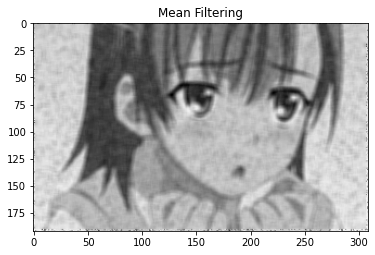

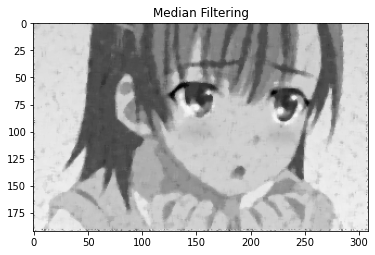

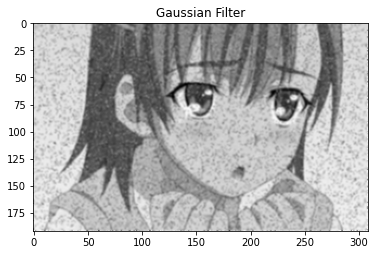

In [ ]:
def meanFilter(img):
  """
  Please add your code below to 
  1. apply the mean filter of the "img"
  2. Display it using the matplotlibe
  """
  newImg = np.array(img)
  radius = 2  # This changes the radius of the kernel size to take the average
  # Source: https://craftofcoding.wordpress.com/2017/11/23/image-mean-filtering-i-in-python/

  for row in range(radius, img.shape[0]-radius):
    for col in range(radius, img.shape[1]-radius):
      # 2D array of the kernel size that is centered on the changing pixel
      block = img[row-radius:row+radius+1, col-radius:col+radius+1]
      mean = np.round(np.mean(block))
      newImg[row][col] = mean
  # for i in range(w,img.shape[0]-w):
  #   for j in range(w,img.shape[1]-w):
  #     block = img[i-w:i+w+1, j-w:j+w+1]
  #     m = np.mean(block,dtype=np.float32)
  #     newImg[i][j] = int(m)
  plt.figure()
  plt.imshow(newImg, plt.cm.gray)
  plt.title("Mean Filtering")
  return newImg

def medianFilter(img):
  """
  Please add your code below to 
  1. apply the median filter of the "img"
  2. Display it using the matplotlibe
  """
  newImg = np.array(img)
  radius = 2
  # Similar concept as meanFiltering, just different formula
  for row in range(radius, img.shape[0]-radius):
    for col in range(radius, img.shape[1]-radius):
      # 2D array of the kernel size that is centered on the changing pixel
      block = img[row-radius:row+radius+1, col-radius:col+radius+1]
      median = np.round(np.median(block))
      newImg[row][col] = median

  plt.figure()
  plt.imshow(newImg, plt.cm.gray)
  plt.title("Median Filtering")
  return newImg

def GaussianFilter(img):
  # Since the kernel was given to us, the kernel size will be static (3x3)
  Kernel=[[1.0,2.0,1.0],[2.0,4.0,2.0],[1.0,2.0,1.0]]
  Kernel=np.array(Kernel)
  Kernel=Kernel*(1.0/16)
  """
  Please add your code below to 
  1. apply the Gaussian filter of the "img"
  2. Display it using the matplotlibe
  """
  # Similar to average filtering in logic, just with weights
  radius=1 # 3x3
  newImg = np.array(img)
  for row in range(radius, img.shape[0]-radius):
    for col in range(radius, img.shape[1]-radius):
      # 2D array of the kernel size that is centered on the changing pixel
      block = img[row-radius:row+radius+1, col-radius:col+radius+1]
      block = np.multiply(block, Kernel)
      newImg[row][col] = np.sum(block)  # Get the sum of weights for pixel
  plt.figure()
  plt.title("Gaussian Filter")
  plt.imshow(newImg, plt.cm.gray)
  return newImg

meanFilter(gray_image_array)
medianFilter(gray_image_array)
x=GaussianFilter(gray_image_array)

## Q1: Please design a kernel or kernels to sharpen the image

(512, 512)


Text(0.5, 1.0, 'grayscale image')

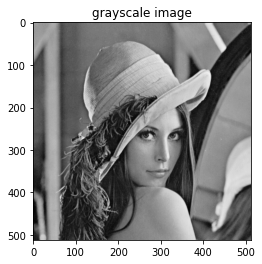

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image=Image.open('Lenna.png')
gray_image=image.convert('L')
gray_image_array=np.asarray(gray_image)

print(gray_image_array.shape)

plt.figure()
plt.imshow(gray_image_array, plt.cm.gray)
plt.title('grayscale image')


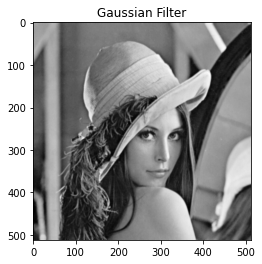

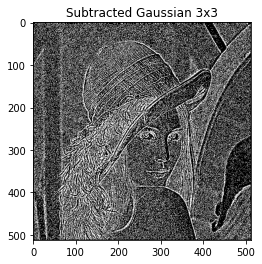

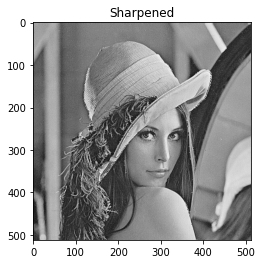

In [ ]:
# """ add your code below to sharpen the above image""""

# Original + a(Detail) = Sharpened
original=np.array(gray_image_array)
smoothed=GaussianFilter(original)
a=3  # Adjusts the impact the details have on the result
     # a=0 -> No impact
     # a>0 -> Sharper image
# Original - Smoothed = Detail
details = np.subtract(original, smoothed)
plt.figure()
plt.title("Subtracted Gaussian 3x3")
plt.imshow(details, plt.cm.gray)

newImg=np.add(gray_image_array, a*details)

plt.figure()
plt.title("Sharpened")
plt.imshow(newImg, plt.cm.gray)

## Q1: Please show the edges of the content in the image

- Please show the edge along the X axis

- Please show the edge along the y axis

- Please show the edge along both axis by showing using the magnitude of X and Y


(512, 512)


Text(0.5, 1.0, 'grayscale image')

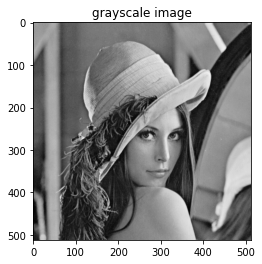

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image=Image.open('Lenna.png')
gray_image=image.convert('L')
gray_image_array=np.asarray(gray_image)

print(gray_image_array.shape)

plt.figure()
plt.imshow(gray_image_array, plt.cm.gray)
plt.title('grayscale image')

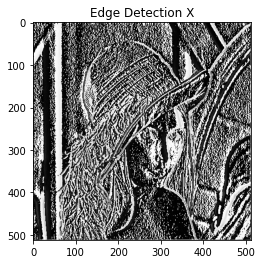

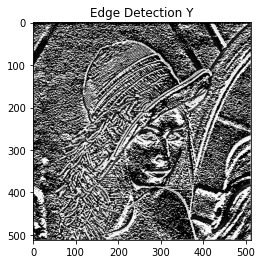

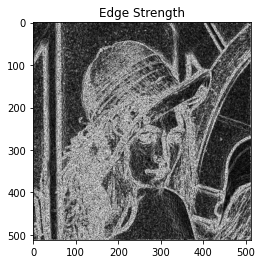

In [ ]:
img=gray_image_array
# show the dege along the X axis below

Sobel_x=np.array([[-1.0, 0.0, 1.0],[-2.0, 0.0, 2.0],[-1.0,0.0,1.0]])

radius=1 # 3x3
edge_x = np.array(img) # Placeholder for image
for row in range(radius, img.shape[0]-radius):
  for col in range(radius, img.shape[1]-radius):
    # Kernel to process
    block = img[row-radius:row+radius+1, col-radius:col+radius+1]
    # Multiply kernel by Sobel Operator
    block = np.multiply(block, Sobel_x)
    # Add sum of block to new image
    # Dividing by 4 shows edges clearer
    edge_x[row][col] = np.sum(block)/4

plt.figure()
plt.title("Edge Detection X")
plt.imshow(edge_x, plt.cm.gray)

# show the dege along the y axis below

Sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
edge_y = np.array(img)

for row in range(radius, img.shape[0]-radius):
  for col in range(radius, img.shape[1]-radius):
    block = img[row-radius:row+radius+1, col-radius:col+radius+1]
    block = np.multiply(block, Sobel_y)
    edge_y[row][col] = np.sum(block)/4

plt.figure()
plt.title("Edge Detection Y")
plt.imshow(edge_y, plt.cm.gray)


# show the dege along both axis below
# edgeMagnitude = sqrt(Gx**2 + Gy**2)
edgeStrength = np.sqrt(np.add(np.square(edge_x), np.square(edge_y)), dtype=np.float32)
edgeStrength *= 255.0 / edgeStrength.max()
theta = np.arctan2(edge_y, edge_x, dtype=np.float32)

plt.figure()
plt.title("Edge Strength")
plt.imshow(edgeStrength, plt.cm.gray)


# This algorithm was used to compare my Edge strength algorithm
Source: https://towardsdatascience.com/edge-detection-in-python-a3c263a13e03

Note: The block below is NOT my solution, as it was pulled verbatim from sourced site. This is just what I used not only go through the steps, but also compare and contrast my resulting solution.



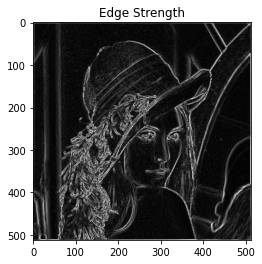

In [ ]:
# This algorithm was used to compare my Edge strength algorithm
# Source: https://towardsdatascience.com/edge-detection-in-python-a3c263a13e03

#define the vertical filter
vertical_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]

#define the horizontal filter
horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]

#read in the pinwheel image
img = gray_image_array

#get the dimensions of the image
n,m = img.shape

#initialize the edges image
edges_img = np.array(img.copy())

#loop over all pixels in the image
for row in range(3, n-2):
    for col in range(3, m-2):
        
        #create little local 3x3 box
        local_pixels = img[row-1:row+2, col-1:col+2]
        
        #apply the vertical filter
        vertical_transformed_pixels = vertical_filter*local_pixels
        #remap the vertical score
        vertical_score = vertical_transformed_pixels.sum()/4
        
        #apply the horizontal filter
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        #remap the horizontal score
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        #combine the horizontal and vertical scores into a total edge score
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        #insert this edge score into the edges image
        edges_img[row, col] = edge_score*3

#remap the values in the 0-1 range in case they went out of bounds
edges_img = edges_img/edges_img.max()

plt.figure()
plt.title("Edge Strength")
plt.imshow(edges_img, plt.cm.gray)

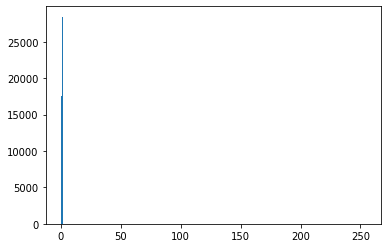

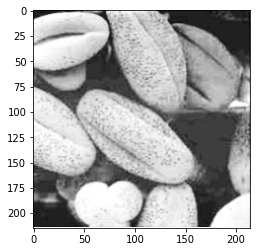

In [ ]:
# Test histogram equalization
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt


image=Image.open('HE.PNG')
gray_image=image.convert('L')
gray_image_array=np.asarray(gray_image)
hist = np.histogram(gray_image_array, bins=256)[0] # This is r_k
S = np.zeros(hist.size)
L = 256
MN = gray_image_array.size
sum = hist.cumsum()
sum = sum * hist.max() / sum.max()
sum = np.round(np.multiply(np.divide(sum, sum[len(sum)-1]), 255))
for k in range(0,L):
  S[k] = ((L-1)/MN)*sum[k]
# plt.plot(S)
newImg = np.zeros(gray_image_array.shape)
for line in range(gray_image_array.shape[0]):
    for pixel in range(gray_image_array.shape[1]):
      temp = gray_image_array[line, pixel] # The old value
      newImg[line][pixel] = S[temp]
plt.figure()
plt.hist(newImg.flatten(), bins=range(0,255))
plt.show()

plt.imshow(newImg, plt.cm.gray)